# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
treatment_results = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
treatment_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_num_mice = len(treatment_results["Mouse ID"].unique())

total_num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
treatment_results_dup = treatment_results.loc[treatment_results.duplicated(subset = ["Mouse ID", "Timepoint"]),'Mouse ID'].unique()

treatment_results_dup

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
treatment_results_dupdf = treatment_results.loc[treatment_results['Mouse ID'] == 'g989', :]

treatment_results_dupdf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = treatment_results[treatment_results['Mouse ID'].isin(treatment_results_dup)==False]
clean_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = len(clean_results["Mouse ID"].unique())

clean_num_mice

248

In [8]:
#mean
mean = clean_results['Tumor Volume (mm3)'].groupby(clean_results['Drug Regimen']).mean()
#median
median = clean_results['Tumor Volume (mm3)'].groupby(clean_results['Drug Regimen']).median()

In [9]:
#variance 
var = clean_results['Tumor Volume (mm3)'].groupby(clean_results['Drug Regimen']).var()
#standard deviation 
stdev = clean_results['Tumor Volume (mm3)'].groupby(clean_results['Drug Regimen']).std()
#SEM
sem = clean_results['Tumor Volume (mm3)'].groupby(clean_results['Drug Regimen']).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#Groupby moved to above

# Assemble the resulting series into a single summary DataFrame.

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                            "Tumor Volume Variance":var, 
                            "Tumor Volume Std. Dev.":stdev, 
                            "Tumor Volume Std. Err.":sem})
#Summary Results
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
sumstat_agg =  clean_results.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
#Display
sumstat_agg 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mcount = clean_results["Drug Regimen"].value_counts()

mcount

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

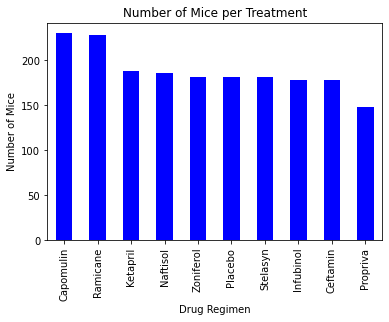

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plot_pd = mcount.plot.bar(color='b')

#x-axis setting
plt.xlabel("Drug Regimen")
#y-axis setting
plt.ylabel("Number of Mice")
#title
plt.title("Number of Mice per Treatment")

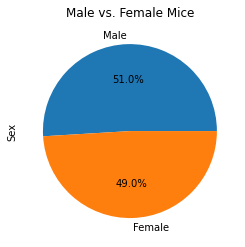

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gen_data = clean_results["Sex"].value_counts() 
plt.title("Male vs. Female Mice")
gen_data.plot.pie(autopct = "%1.1f%%")
plt.show()

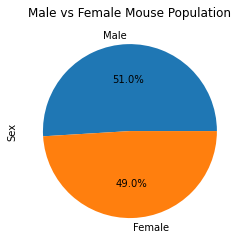

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ("Male", "Female")
plot = gen_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = clean_results.loc[clean_results["Drug Regimen"] == "Capomulin",:]

Ramicane = clean_results.loc[clean_results["Drug Regimen"] == "Ramicane", :]

Infubinol = clean_results.loc[clean_results["Drug Regimen"] == "Infubinol", :]

Ceftamin = clean_results.loc[clean_results["Drug Regimen"] == "Ceftamin", :]


In [19]:
# Start by getting the last (greatest) timepoint for each mouse
#Capomulin
Capomulin_last = Capomulin.groupby("Mouse ID").max()["Timepoint"]

Capomulin_volume = pd.DataFrame(Capomulin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Cap_merge = pd.merge(Capomulin_volume, clean_results, on = ("Mouse ID", "Timepoint"), how = "left")
Cap_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [20]:
#Ramicane
Ramicane_last = Ramicane.groupby("Mouse ID").max()["Timepoint"]

Ramicane_volume = pd.DataFrame(Ramicane_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ram_merge = pd.merge(Ramicane_volume, clean_results, on = ("Mouse ID", "Timepoint"), how = "left")
Ram_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [21]:
#Infubinol
Infubinol_last = Infubinol.groupby("Mouse ID").max()["Timepoint"]

Infubinol_volume = pd.DataFrame(Infubinol_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Inf_merge = pd.merge(Infubinol_volume, clean_results, on = ("Mouse ID", "Timepoint"), how = "left")
Inf_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [22]:
#Ceftamin 
Ceftamin_last = Ceftamin.groupby("Mouse ID").max()["Timepoint"]

Ceftamin_volume = pd.DataFrame(Ceftamin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Cef_merge = pd.merge(Ceftamin_volume, clean_results, on = ("Mouse ID", "Timepoint"), how = "left")
Cef_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treat_list = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"]
treatments = clean_results[clean_results["Drug Regimen"].isin(treat_list)]
treatments.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treat_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

#print statements
print(f"Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64")
print(f"Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64")
print(f"Infubinol's potential outliers: 31    36.321346")
print(f"Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64")

NameError: name 'last_timepoint' is not defined

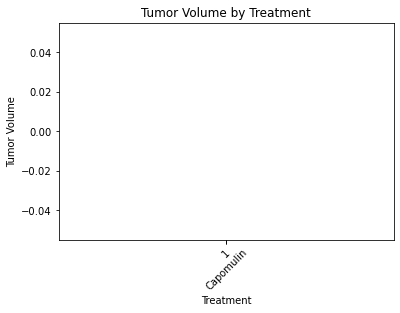

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [] 

figure = plt.figure
plt.xlabel ("Treatment")
plt.xticks([1, 2, 3, 4], treat_list, rotation = 45) 
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Treatment")
plt.boxplot(boxplot_list)

plt.show()

## Line and Scatter Plots

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [43]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

